## Libralies and Data PREP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

!pip install pandas gspread
!pip install seaborn

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
file_path = '/content/drive/MyDrive/AIA_Case_DataScientist_Chackrit-Phaophanlop_May2024/AIA.csv'
data = pd.read_csv(file_path)

data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152451 entries, 0 to 152450
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   policy_id                         152451 non-null  int64 
 1   policy_annual_premium             152451 non-null  int64 
 2   cus_id                            152451 non-null  int64 
 3   customer_gender                   152451 non-null  object
 4   customer_age                      152451 non-null  int64 
 5   cus_marital_status                152451 non-null  object
 6   cus_ct_A1_product_holding         152451 non-null  int64 
 7   cus_ct_A2_product_holding         152451 non-null  int64 
 8   cus_ct_C1_product_holding         152451 non-null  int64 
 9   cus_ct_E1_product_holding         152451 non-null  int64 
 10  cus_ct_H1_product_holding         152451 non-null  int64 
 11  cus_ct_H2_product_holding         152451 non-null  int64 
 12  ca

,policy_id,policy_annual_premium,cus_id,customer_age,cus_ct_A1_product_holding,cus_ct_A2_product_holding,cus_ct_C1_product_holding,cus_ct_E1_product_holding,cus_ct_H1_product_holding,cus_ct_H2_product_holding,campaign_offer_date,campaign_offer_percent,number_of_campaign_offer_product,campaign_premium
count,1.524510e+05,1.524510e+05,1.524510e+05,152451.000000,152451.000000,152451.000000,152451.000000,152451.000000,152451.000000,152451.000000,152451.000000,152451.000000,152451.000000,152451.000000
mean,8.563514e+08,1.940590e+05,9.455386e+08,35.830083,0.259723,0.384386,0.420988,0.091577,0.513522,0.288539,201751.007661,12.706607,1.505815,13568.797817
std,3.490739e+07,2.183577e+05,1.969496e+08,15.573705,0.512086,0.764200,0.619774,0.310571,0.607545,0.510691,53.288099,2.491456,0.613404,15872.970425
min,7.964809e+08,1.508900e+04,8.201805e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,201612.000000,10.000000,1.000000,1095.000000
25%,8.235592e+08,7.171500e+04,9.869817e+08,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,201702.000000,10.000000,1.000000,4500.000000
50%,8.529114e+08,1.295670e+05,9.900308e+08,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,201801.000000,15.000000,1.000000,9000.000000
75%,8.895949e+08,2.284800e+05,9.938399e+08,49.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,201802.000000,15.000000,2.000000,15375.000000
max,9.976256e+08,3.872940e+06,9.999625e+08,70.000000,8.000000,18.000000,8.000000,6.000000,12.000000,6.000000,201802.000000,15.000000,6.000000,473775.000000


In [ ]:
data.head()

,policy_id,policy_annual_premium,cus_id,customer_gender,customer_age,cus_marital_status,cus_ct_A1_product_holding,cus_ct_A2_product_holding,cus_ct_C1_product_holding,cus_ct_E1_product_holding,cus_ct_H1_product_holding,cus_ct_H2_product_holding,campaign_offer_date,campaign_offer_percent,number_of_campaign_offer_product,campaign_offer_product,campaign_premium,campaign_take_up
0,997625582,60345,999792864,F,44,00 NA,0,2,1,0,0,0,201701,10,1,C1,4881,N
1,997625582,60345,999792864,F,45,00 NA,0,2,1,0,0,0,201801,15,1,E1,8145,N
2,997585949,88095,999789099,F,35,01 Single,1,2,0,0,0,0,201702,10,1,A1,4500,N
3,997585949,88095,999789099,F,36,01 Single,1,2,0,0,0,0,201802,15,1,A2,9375,N
4,997578875,75510,999788545,M,58,00 NA,0,1,0,0,0,0,201702,10,1,A1,4500,N


## 1

<ipython-input-5-c19a4a8ed399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_offers['campaign_premium'] = pd.to_numeric(accepted_offers['campaign_premium'], errors='coerce')


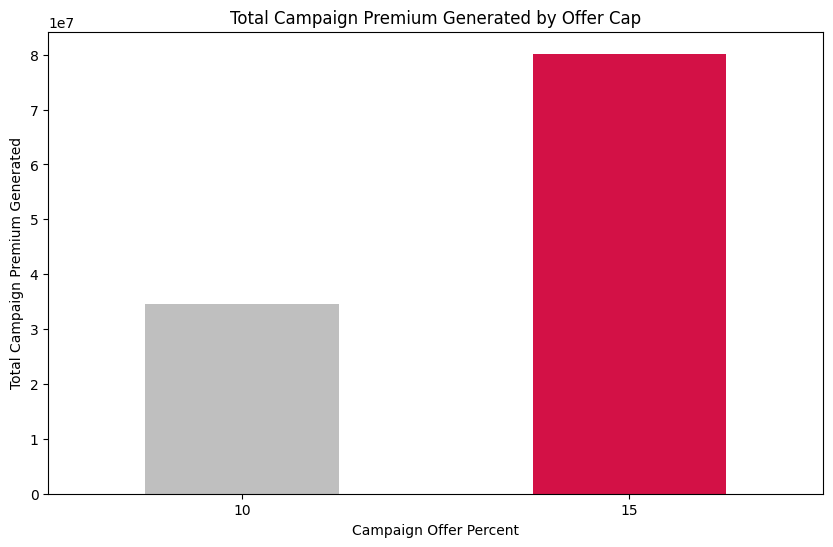

In [ ]:
accepted_offers = data[data['campaign_take_up'] == 'Y']
accepted_offers['campaign_premium'] = pd.to_numeric(accepted_offers['campaign_premium'], errors='coerce')

total_premium_by_cap = accepted_offers.groupby('campaign_offer_percent')['campaign_premium'].sum()

plt.figure(figsize=(10, 6))

colors = ['#bfbfbf', '#d31146']

total_premium_by_cap.plot(kind='bar', color=colors)

plt.title('Total Campaign Premium Generated by Offer Cap')
plt.xlabel('Campaign Offer Percent')
plt.ylabel('Total Campaign Premium Generated')
plt.xticks(rotation=0)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 2. total campaign premium generated by age group

<ipython-input-6-fd60beddd57f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_offers['age_group'] = pd.cut(accepted_offers['customer_age'], bins=bins, labels=labels, right=False)


<Figure size 1400x800 with 0 Axes>

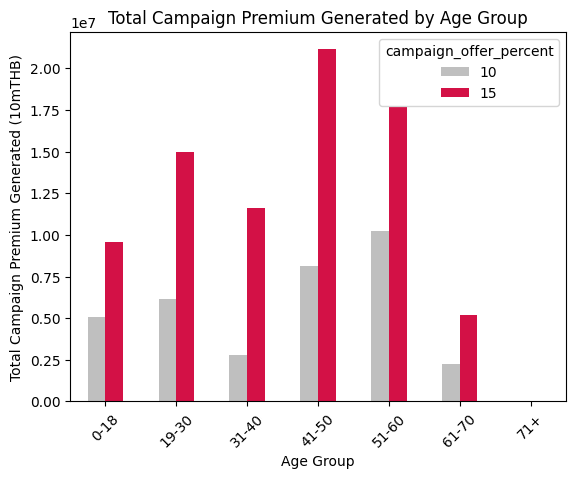

In [ ]:
bins = [0, 19, 31, 41, 51, 61, 71, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']

accepted_offers['age_group'] = pd.cut(accepted_offers['customer_age'], bins=bins, labels=labels, right=False)
data['age_group'] = pd.cut(data['customer_age'], bins=bins, labels=labels, right=False)

premium_by_age_group = accepted_offers.groupby(['age_group', 'campaign_offer_percent'])['campaign_premium'].sum().unstack()

plt.figure(figsize=(14, 8))
premium_by_age_group.plot(kind='bar', color=colors, alpha=1)

plt.title('Total Campaign Premium Generated by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Campaign Premium Generated (10mTHB)')
plt.xticks(rotation=45)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 3. total campaign premium generated by marital status

<Figure size 1400x800 with 0 Axes>

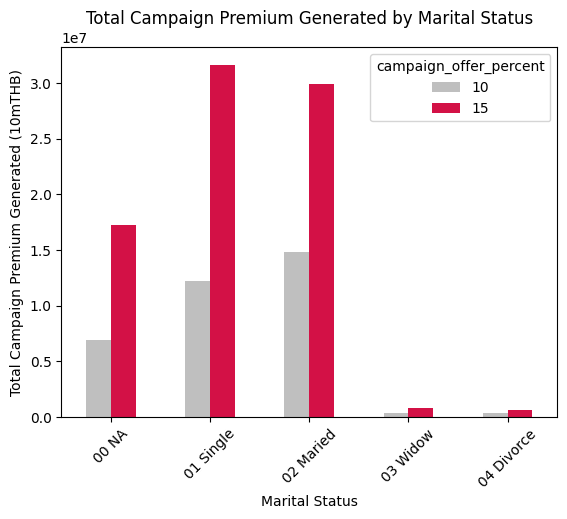

In [ ]:
premium_by_marital_status = accepted_offers.groupby(['cus_marital_status', 'campaign_offer_percent'])['campaign_premium'].sum().unstack()

plt.figure(figsize=(14, 8))
premium_by_marital_status.plot(kind='bar', color=colors, alpha=1)

plt.title('Total Campaign Premium Generated by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Campaign Premium Generated (10mTHB)')
plt.xticks(rotation=45)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 4. total campaign premium generated by gender

<Figure size 1400x800 with 0 Axes>

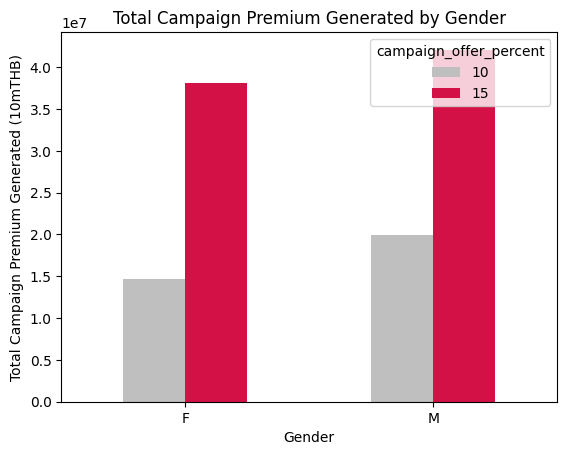

In [ ]:
premium_by_gender = accepted_offers.groupby(['customer_gender', 'campaign_offer_percent'])['campaign_premium'].sum().unstack()

plt.figure(figsize=(14, 8))
premium_by_gender.plot(kind='bar', color=colors, alpha=1)

plt.title('Total Campaign Premium Generated by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Campaign Premium Generated (10mTHB)')
plt.xticks(rotation=0)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 5. total campaign premium generated by annual premium

<ipython-input-59-3cde6ac40828>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_offers['premium_group'] = pd.cut(accepted_offers['policy_annual_premium'], bins=premium_bins, labels=premium_labels, right=False)


<Figure size 1900x1000 with 0 Axes>

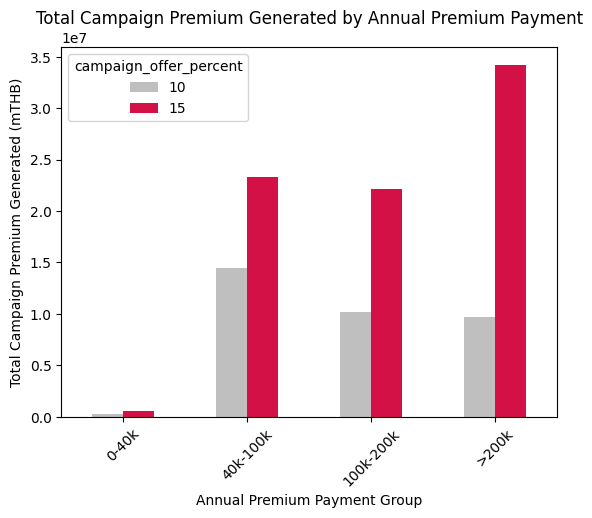

In [ ]:
premium_bins = [0, 40000, 100000, 200000, 100000000]
premium_labels = ['0-40k', '40k-100k', '100k-200k', '>200k']

accepted_offers['premium_group'] = pd.cut(accepted_offers['policy_annual_premium'], bins=premium_bins, labels=premium_labels, right=False)

premium_by_premium_group = accepted_offers.groupby(['premium_group', 'campaign_offer_percent'])['campaign_premium'].sum().unstack()

plt.figure(figsize=(19, 10))
premium_by_premium_group.plot(kind='bar', color=colors, alpha=1)

plt.title('Total Campaign Premium Generated by Annual Premium Payment')
plt.xlabel('Annual Premium Payment Group')
plt.ylabel('Total Campaign Premium Generated (mTHB)')
plt.xticks(rotation=45)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 5. total campaign premium generated by product holding

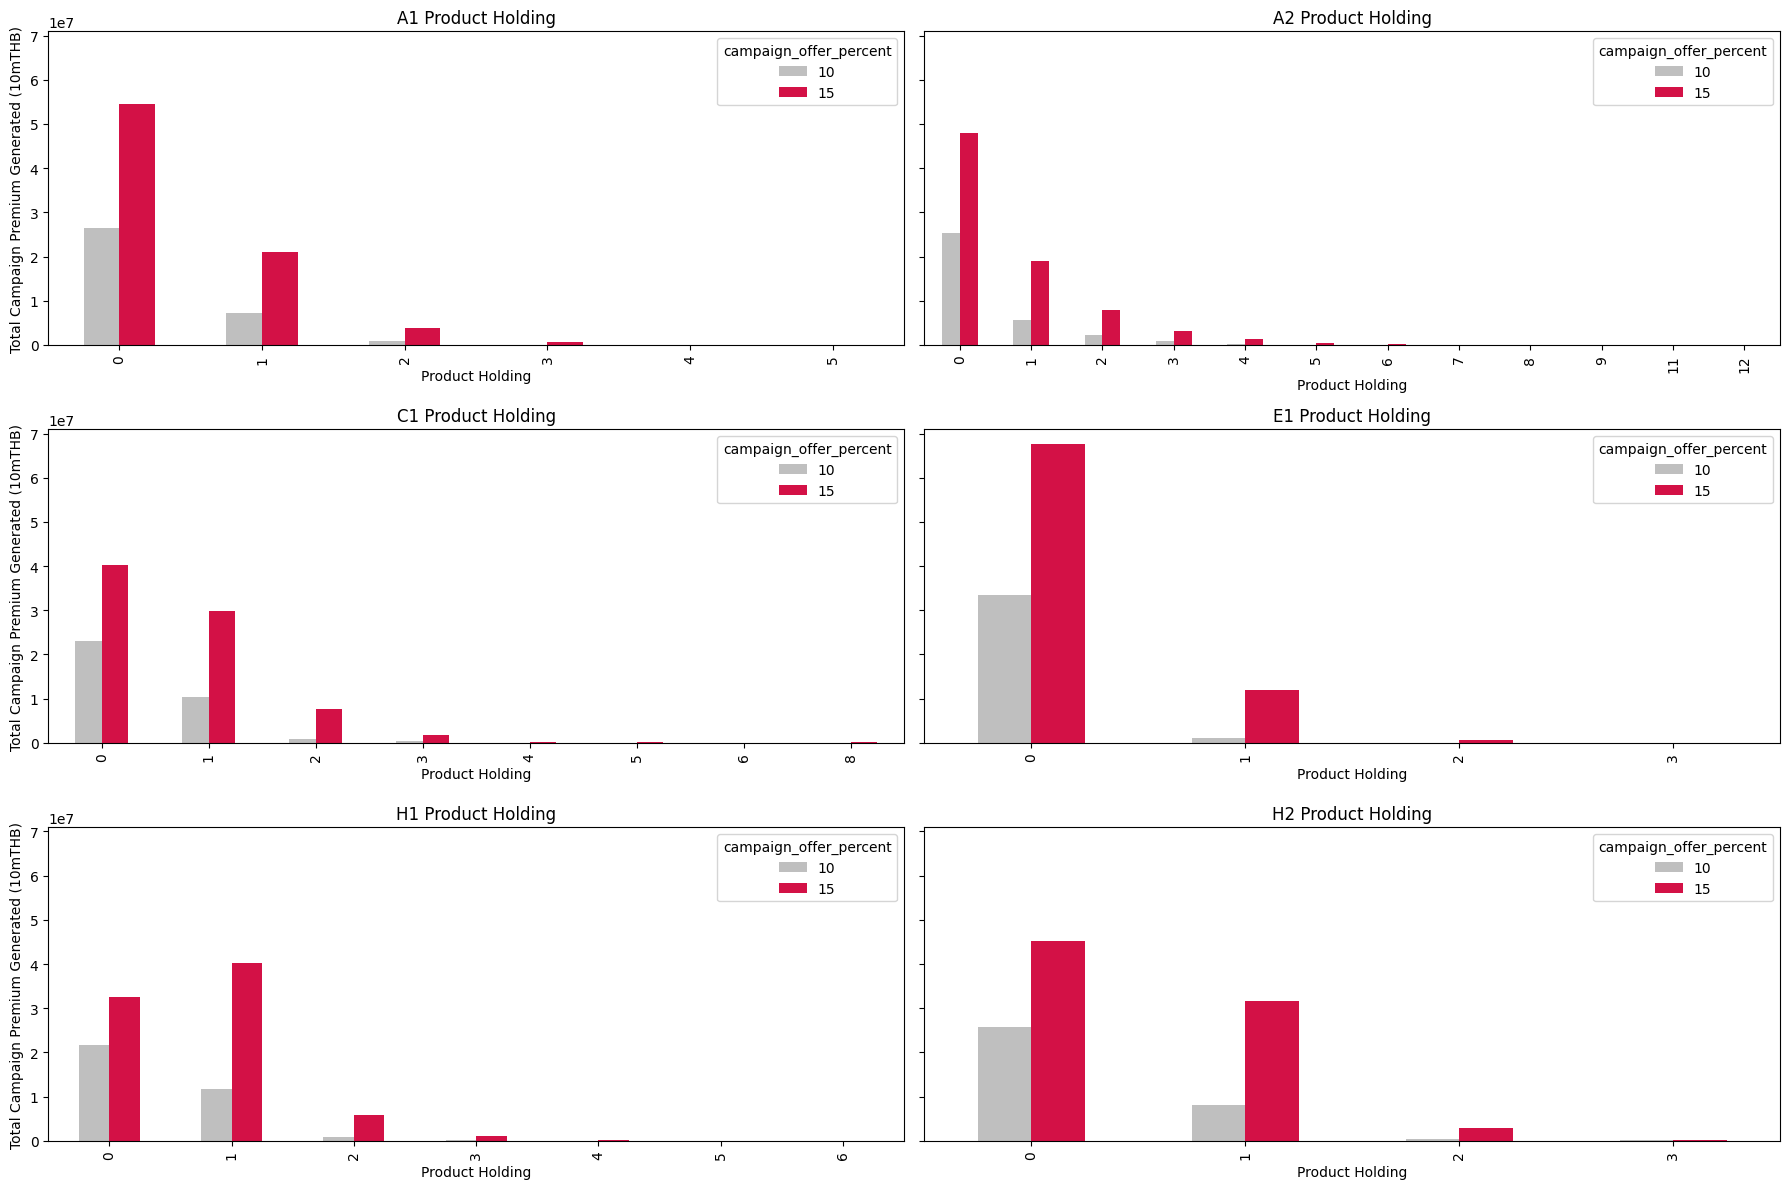

In [ ]:
products = ['cus_ct_A1_product_holding', 'cus_ct_A2_product_holding', 'cus_ct_C1_product_holding',
            'cus_ct_E1_product_holding', 'cus_ct_H1_product_holding', 'cus_ct_H2_product_holding']

premium_by_product_holding = {}

for product in products:
    premium_by_product_holding[product] = accepted_offers.groupby([product, 'campaign_offer_percent'])['campaign_premium'].sum().unstack()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, (product, df) in enumerate(premium_by_product_holding.items()):
    df.plot(kind='bar', ax=axes[i], color=colors, alpha=1, title=product.split('_')[-3] + ' Product Holding')
    axes[i].set_xlabel('Product Holding')
    axes[i].set_ylabel('Total Campaign Premium Generated (10mTHB)')
    axes[i].grid(False)
    axes[i].patch.set_alpha(0)
    axes[i].figure.patch.set_alpha(0)

plt.tight_layout()
plt.show()

## 6. campaign acceptance rate by age group

<Figure size 1400x800 with 0 Axes>

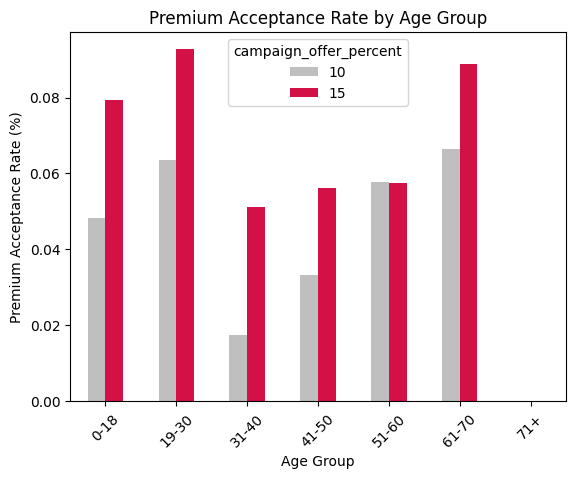

In [ ]:
total_offers_age_group = data.groupby(['age_group', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='total_campaign_premium')
accepted_offers_age_group = accepted_offers.groupby(['age_group', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='accepted_campaign_premium')

acceptance_rate_age_group = pd.merge(total_offers_age_group, accepted_offers_age_group, on=['age_group', 'campaign_offer_percent'])

acceptance_rate_age_group['acceptance_rate'] = acceptance_rate_age_group['accepted_campaign_premium'] / acceptance_rate_age_group['total_campaign_premium']

plt.figure(figsize=(14, 8))
acceptance_rate_age_group_pivot = acceptance_rate_age_group.pivot(index='age_group', columns='campaign_offer_percent', values='acceptance_rate')
acceptance_rate_age_group_pivot.plot(kind='bar', color=colors, alpha=1)

plt.title('Premium Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Premium Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 7. campaign acceptance rate by Marital Status

<Figure size 1400x800 with 0 Axes>

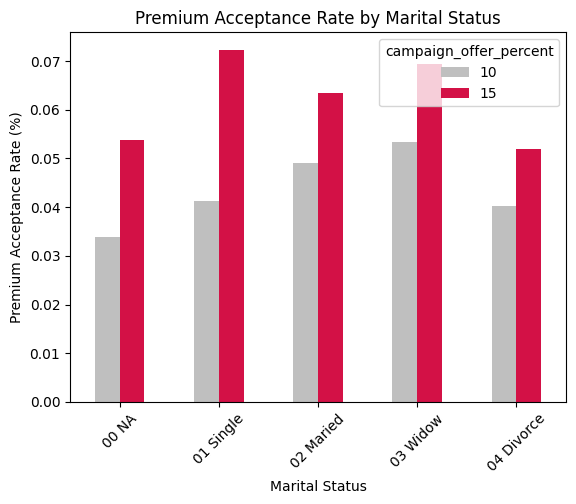

In [ ]:
total_offers_marital_status = data.groupby(['cus_marital_status', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='total_campaign_premium')
accepted_offers_marital_status = accepted_offers.groupby(['cus_marital_status', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='accepted_campaign_premium')

acceptance_rate_marital_status = pd.merge(total_offers_marital_status, accepted_offers_marital_status, on=['cus_marital_status', 'campaign_offer_percent'])

acceptance_rate_marital_status['acceptance_rate'] = acceptance_rate_marital_status['accepted_campaign_premium'] / acceptance_rate_marital_status['total_campaign_premium']

plt.figure(figsize=(14, 8))
acceptance_rate_marital_status_pivot = acceptance_rate_marital_status.pivot(index='cus_marital_status', columns='campaign_offer_percent', values='acceptance_rate')
acceptance_rate_marital_status_pivot.plot(kind='bar', color=colors, alpha=1)

plt.title('Premium Acceptance Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Premium Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()


## 8. campaign acceptance rate by Gender

<Figure size 1400x800 with 0 Axes>

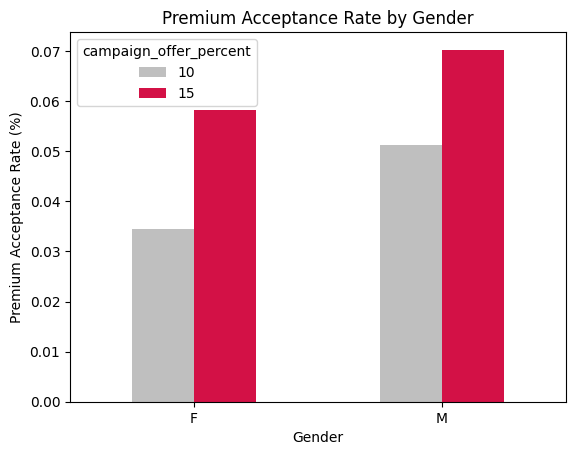

In [ ]:
total_offers_gender = data.groupby(['customer_gender', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='total_campaign_premium')
accepted_offers_gender = accepted_offers.groupby(['customer_gender', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='accepted_campaign_premium')

acceptance_rate_gender = pd.merge(total_offers_gender, accepted_offers_gender, on=['customer_gender', 'campaign_offer_percent'])

acceptance_rate_gender['acceptance_rate'] = acceptance_rate_gender['accepted_campaign_premium'] / acceptance_rate_gender['total_campaign_premium']

plt.figure(figsize=(14, 8))
acceptance_rate_gender_pivot = acceptance_rate_gender.pivot(index='customer_gender', columns='campaign_offer_percent', values='acceptance_rate')
acceptance_rate_gender_pivot.plot(kind='bar', color=colors, alpha=1)

plt.title('Premium Acceptance Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Premium Acceptance Rate (%)')
plt.xticks(rotation=0)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 9. campaign acceptance rate by Annual Premium

<Figure size 1900x1000 with 0 Axes>

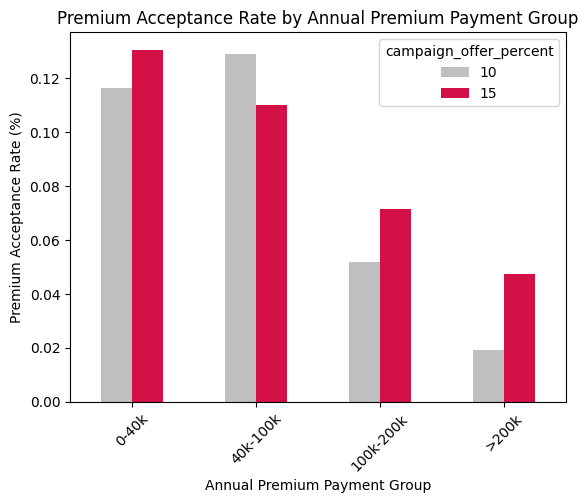

In [ ]:
data['premium_group'] = pd.cut(data['policy_annual_premium'], bins=premium_bins, labels=premium_labels, right=False)

total_offers_premium_group = data.groupby(['premium_group', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='total_campaign_premium')
accepted_offers_premium_group = accepted_offers.groupby(['premium_group', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='accepted_campaign_premium')

acceptance_rate_premium_group = pd.merge(total_offers_premium_group, accepted_offers_premium_group, on=['premium_group', 'campaign_offer_percent'])

acceptance_rate_premium_group['acceptance_rate'] = acceptance_rate_premium_group['accepted_campaign_premium'] / acceptance_rate_premium_group['total_campaign_premium']

plt.figure(figsize=(19, 10))
acceptance_rate_premium_group_pivot = acceptance_rate_premium_group.pivot(index='premium_group', columns='campaign_offer_percent', values='acceptance_rate')
acceptance_rate_premium_group_pivot.plot(kind='bar', color=colors, alpha=1)

plt.title('Premium Acceptance Rate by Annual Premium Payment Group')
plt.xlabel('Annual Premium Payment Group')
plt.ylabel('Premium Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.grid(False)

plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

## 10. campaign acceptance rate by Product

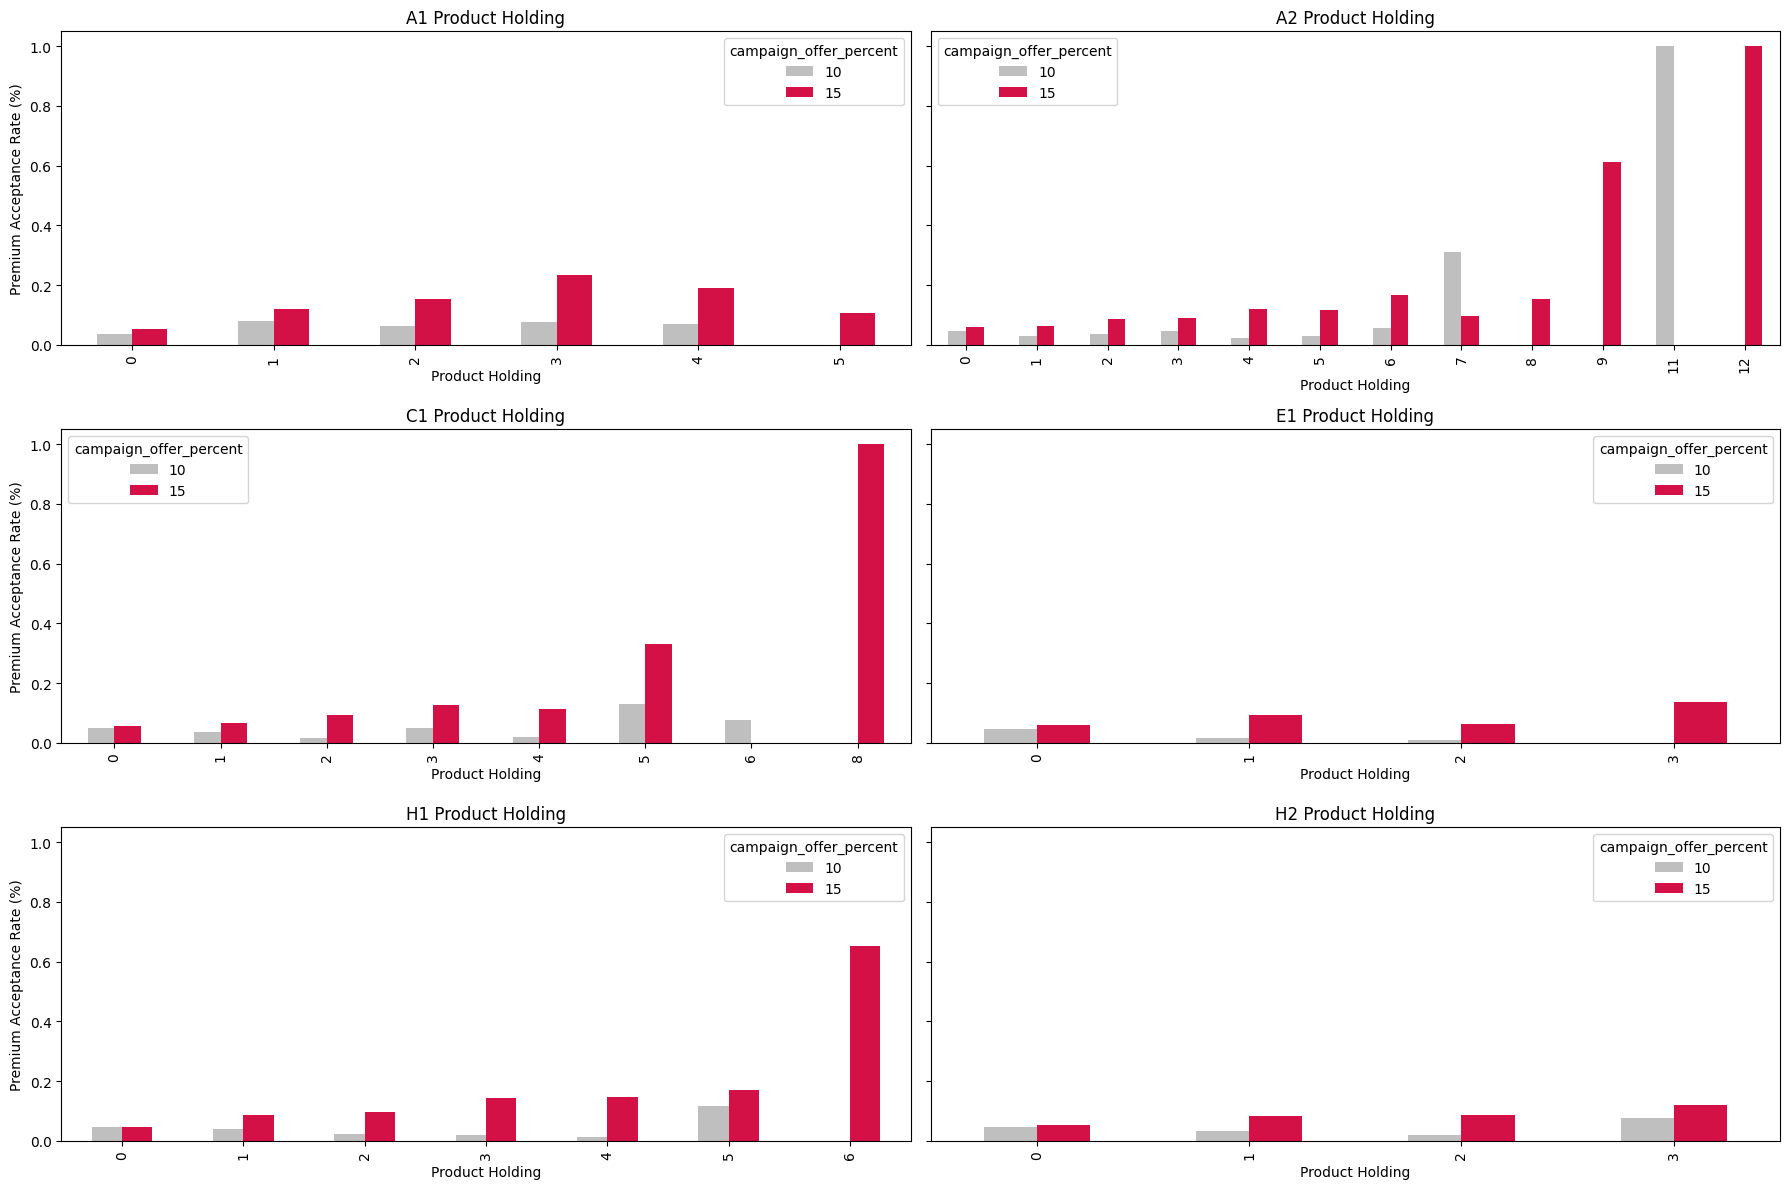

In [ ]:
premium_by_product_holding = {}
total_premium_by_product_holding = {}
accepted_premium_by_product_holding = {}

for product in products:
    total_premium_by_product_holding[product] = data.groupby([product, 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='total_campaign_premium')
    accepted_premium_by_product_holding[product] = accepted_offers.groupby([product, 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='accepted_campaign_premium')
    premium_by_product_holding[product] = pd.merge(total_premium_by_product_holding[product], accepted_premium_by_product_holding[product], on=[product, 'campaign_offer_percent'])
    premium_by_product_holding[product]['acceptance_rate'] = premium_by_product_holding[product]['accepted_campaign_premium'] / premium_by_product_holding[product]['total_campaign_premium']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, (product, df) in enumerate(premium_by_product_holding.items()):
    df_pivot = df.pivot(index=product, columns='campaign_offer_percent', values='acceptance_rate')
    df_pivot.plot(kind='bar', ax=axes[i], color=colors, alpha=1, title=product.split('_')[-3] + ' Product Holding')
    axes[i].set_xlabel('Product Holding')
    axes[i].set_ylabel('Premium Acceptance Rate (%)')
    axes[i].grid(False)
    axes[i].patch.set_alpha(0)
    axes[i].figure.patch.set_alpha(0)

plt.tight_layout()
plt.show()

Data as Table

In [ ]:
accepted_revenue_by_cap = accepted_offers.groupby('campaign_offer_percent')['campaign_premium'].sum().reset_index(name='accepted_revenue')

total_offers_by_cap = data.groupby('campaign_offer_percent')['campaign_premium'].sum().reset_index(name='total_offered_premium')

acceptance_rate_by_cap = pd.merge(total_offers_by_cap, accepted_revenue_by_cap, on='campaign_offer_percent')
acceptance_rate_by_cap['acceptance_rate'] = acceptance_rate_by_cap['accepted_revenue'] / acceptance_rate_by_cap['total_offered_premium']

acceptance_rate_by_cap


,campaign_offer_percent,total_offered_premium,accepted_revenue,acceptance_rate
0,10,816058334,34615908,0.042418
1,15,1252518462,80188623,0.064022


In [ ]:
total_offers_age_group = data.groupby(['age_group', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='total_campaign_premium')
accepted_offers_age_group = accepted_offers.groupby(['age_group', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='accepted_campaign_premium')

acceptance_rate_age_group = pd.merge(total_offers_age_group, accepted_offers_age_group, on=['age_group', 'campaign_offer_percent'])
acceptance_rate_age_group['acceptance_rate'] = acceptance_rate_age_group['accepted_campaign_premium'] / acceptance_rate_age_group['total_campaign_premium']

acceptance_rate_age_group_pivot = acceptance_rate_age_group.pivot(index='age_group', columns='campaign_offer_percent', values=['total_campaign_premium', 'accepted_campaign_premium', 'acceptance_rate'])

acceptance_rate_age_group_pivot

total_campaign_premium               \
campaign_offer_percent                     10           15   
age_group                                                    
0-18                              104816565.0  120217961.0   
19-30                              96770145.0  161855109.0   
31-40                             160450404.0  227267887.0   
41-50                             242903355.0  376562594.0   
51-60                             177481979.0  308389292.0   
61-70                              33635886.0   58225619.0   
71+                                       0.0          0.0   

                       accepted_campaign_premium             acceptance_rate  \
campaign_offer_percent                        10          15              10   
age_group                                                                      
0-18                                   5063610.0   9545850.0        0.048309   
19-30                                  6158313.0  14995446.0        0.063639   
31-40                                  2789483.0  11634092.0        0.017385   
41-50                                  8106790.0  21137761.0        0.033375   
51-60                                 10262367.0  17710984.0        0.057822   
61-70                                  2235345.0   5164490.0        0.066457   
71+                                          0.0         0.0             NaN   

                                  
campaign_offer_percent        15  
age_group                         
0-18                    0.079405  
19-30                   0.092647  
31-40                   0.051191  
41-50                   0.056133  
51-60                   0.057431  
61-70                   0.088698  
71+                          NaN

In [ ]:
total_offers_gender = data.groupby(['customer_gender', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='total_campaign_premium')
accepted_offers_gender = accepted_offers.groupby(['customer_gender', 'campaign_offer_percent'])['campaign_premium'].sum().reset_index(name='accepted_campaign_premium')

acceptance_rate_gender = pd.merge(total_offers_gender, accepted_offers_gender, on=['customer_gender', 'campaign_offer_percent'])
acceptance_rate_gender['acceptance_rate'] = acceptance_rate_gender['accepted_campaign_premium'] / acceptance_rate_gender['total_campaign_premium']

acceptance_rate_gender_pivot = acceptance_rate_gender.pivot(index='customer_gender', columns='campaign_offer_percent', values=['total_campaign_premium', 'accepted_campaign_premium', 'acceptance_rate'])

acceptance_rate_gender_pivot

total_campaign_premium               \
campaign_offer_percent                     10           15   
customer_gender                                              
F                                 425744825.0  653479659.0   
M                                 390313509.0  599038803.0   

                       accepted_campaign_premium             acceptance_rate  \
campaign_offer_percent                        10          15              10   
customer_gender                                                                
F                                     14641636.0  38103959.0        0.034391   
M                                     19974272.0  42084664.0        0.051175   

                                  
campaign_offer_percent        15  
customer_gender                   
F                       0.058309  
M                       0.070254

In [ ]:

accepted_offers['premium_group'] = pd.cut(accepted_offers['policy_annual_premium'], bins=premium_bins, labels=premium_labels, right=False)

premium_by_premium_group = accepted_offers.groupby(['premium_group', 'campaign_offer_percent'])['campaign_premium'].sum().unstack()

premium_by_premium_group

<ipython-input-66-c03661f1771e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_offers['premium_group'] = pd.cut(accepted_offers['policy_annual_premium'], bins=premium_bins, labels=premium_labels, right=False)


campaign_offer_percent,10,15
premium_group,,
0-40k,253741,532511
40k-100k,14482186,23263298
100k-200k,10141060,22168027
>200k,9738921,34224787


## Relationship Analysis

In [ ]:
data["actual_offer_percent"] = (data["campaign_premium"] / data["policy_annual_premium"]) * 100

In [ ]:
#Regression Analysis for overall

data['campaign_take_up_binary'] = data['campaign_take_up'].apply(lambda x: 1 if x == 'Y' else 0)
regression_data = data[['campaign_offer_percent', 'campaign_take_up_binary']]

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data['campaign_take_up_binary'], regression_data[['const', 'campaign_offer_percent']])
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.286659
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     campaign_take_up_binary   No. Observations:               152451
Model:                               Logit   Df Residuals:                   152449
Method:                                MLE   Df Model:                            1
Date:                     Fri, 17 May 2024   Pseudo R-squ.:                0.001040
Time:                             12:30:17   Log-Likelihood:                -43702.
converged:                            True   LL-Null:                       -43747.
Covariance Type:                 nonrobust   LLR p-value:                 1.456e-21
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8537      0.049

In [ ]:
#Regression Analysis

data['campaign_take_up_binary'] = data['campaign_take_up'].apply(lambda x: 1 if x == 'Y' else 0)
regression_data = data[['actual_offer_percent', 'campaign_take_up_binary']]

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data['campaign_take_up_binary'], regression_data[['const', 'actual_offer_percent']])
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.286882
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     campaign_take_up_binary   No. Observations:               152451
Model:                               Logit   Df Residuals:                   152449
Method:                                MLE   Df Model:                            1
Date:                     Fri, 17 May 2024   Pseudo R-squ.:               0.0002641
Time:                             09:32:46   Log-Likelihood:                -43735.
converged:                            True   LL-Null:                       -43747.
Covariance Type:                 nonrobust   LLR p-value:                 1.535e-06
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.3157      0.019   -12

In [ ]:
data.head()

,policy_id,policy_annual_premium,cus_id,customer_gender,customer_age,cus_marital_status,cus_ct_A1_product_holding,cus_ct_A2_product_holding,cus_ct_C1_product_holding,cus_ct_E1_product_holding,...,campaign_offer_date,campaign_offer_percent,number_of_campaign_offer_product,campaign_offer_product,campaign_premium,campaign_take_up,age_group,premium_group,campaign_take_up_binary,actual_offer_percent
0,997625582,60345,999792864,F,44,00 NA,0,2,1,0,...,201701,10,1,C1,4881,N,41-50,60k-80k,0,8.088491
1,997625582,60345,999792864,F,45,00 NA,0,2,1,0,...,201801,15,1,E1,8145,N,41-50,60k-80k,0,13.497390
2,997585949,88095,999789099,F,35,01 Single,1,2,0,0,...,201702,10,1,A1,4500,N,31-40,80k-100k,0,5.108122
3,997585949,88095,999789099,F,36,01 Single,1,2,0,0,...,201802,15,1,A2,9375,N,31-40,80k-100k,0,10.641921
4,997578875,75510,999788545,M,58,00 NA,0,1,0,0,...,201702,10,1,A1,4500,N,51-60,60k-80k,0,5.959476


In [ ]:
#regression for actual cap with annual group

annualgroup_actual = data[data['premium_group'].isin(['40k-60k','60k-80k'])]
#annualgroup_actual.head()

regression_data = annualgroup_actual[['actual_offer_percent', 'campaign_take_up_binary']]

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data['campaign_take_up_binary'], regression_data[['const', 'actual_offer_percent']])
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.395093
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     campaign_take_up_binary   No. Observations:                43075
Model:                               Logit   Df Residuals:                    43073
Method:                                MLE   Df Model:                            1
Date:                     Fri, 17 May 2024   Pseudo R-squ.:                0.006266
Time:                             10:42:32   Log-Likelihood:                -17019.
converged:                            True   LL-Null:                       -17126.
Covariance Type:                 nonrobust   LLR p-value:                 1.346e-48
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4640      0.030    -4

In [ ]:
#regression for cap with annual group
low_group = ['0-40k', '40k-100k']
high_group = ['>200k']
mid_group = ['100k-200k']

annualgroup_cap = data[data['premium_group'].isin(mid_group)]
#annualgroup100k.head()

regression_data = annualgroup_cap[['campaign_offer_percent', 'campaign_take_up_binary']]

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data['campaign_take_up_binary'], regression_data[['const', 'campaign_offer_percent']])
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.247466
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     campaign_take_up_binary   No. Observations:                47356
Model:                               Logit   Df Residuals:                    47354
Method:                                MLE   Df Model:                            1
Date:                     Fri, 17 May 2024   Pseudo R-squ.:                0.003187
Time:                             11:22:52   Log-Likelihood:                -11719.
converged:                            True   LL-Null:                       -11756.
Covariance Type:                 nonrobust   LLR p-value:                 4.869e-18
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.4537      0.100

In [ ]:
annualgroup_cap = data[data['premium_group'].isin(high_group)]
#annualgroup100k.head()

regression_data = annualgroup_cap[['campaign_offer_percent', 'campaign_take_up_binary']]

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data['campaign_take_up_binary'], regression_data[['const', 'campaign_offer_percent']])
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.170203
         Iterations 8
                              Logit Regression Results                             
Dep. Variable:     campaign_take_up_binary   No. Observations:                47578
Model:                               Logit   Df Residuals:                    47576
Method:                                MLE   Df Model:                            1
Date:                     Fri, 17 May 2024   Pseudo R-squ.:                 0.01568
Time:                             11:23:01   Log-Likelihood:                -8097.9
converged:                            True   LL-Null:                       -8226.9
Covariance Type:                 nonrobust   LLR p-value:                 4.754e-58
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.1603      0.137

In [ ]:
annualgroup_cap = data[data['premium_group'].isin(low_group)]
#annualgroup100k.head()

regression_data = annualgroup_cap[['campaign_offer_percent', 'campaign_take_up_binary']]

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data['campaign_take_up_binary'], regression_data[['const', 'campaign_offer_percent']])
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.387663
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     campaign_take_up_binary   No. Observations:                57517
Model:                               Logit   Df Residuals:                    57515
Method:                                MLE   Df Model:                            1
Date:                     Fri, 17 May 2024   Pseudo R-squ.:               9.556e-05
Time:                             11:23:07   Log-Likelihood:                -22297.
converged:                            True   LL-Null:                       -22299.
Covariance Type:                 nonrobust   LLR p-value:                   0.03898
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.7649      0.064

##2 forecast

In [ ]:
hypothetical_caps = [20, 25, 30]

hypothetical_data = pd.DataFrame({'campaign_offer_percent': hypothetical_caps})
hypothetical_data = sm.add_constant(hypothetical_data)
predicted_acceptance_rates = result.predict(hypothetical_data)

total_offered_premium_15 = total_offers_by_cap.loc[total_offers_by_cap['campaign_offer_percent'] == 15, 'total_offered_premium'].values[0]
hypothetical_revenues = predicted_acceptance_rates * total_offered_premium_15

hypothetical_summary = pd.DataFrame({
    'offer_cap': hypothetical_caps,
    'predicted_acceptance_rate': predicted_acceptance_rates,
    'predicted_revenue': hypothetical_revenues
})

hypothetical_summary

,offer_cap,predicted_acceptance_rate,predicted_revenue
0,20,0.105233,1.318060e+08
1,25,0.123244,1.543652e+08
2,30,0.143842,1.801648e+08
